<a href="https://colab.research.google.com/github/Stepeech/DataMining/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_6_%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_K_%D0%B1%D0%BB%D0%B8%D0%B6%D0%B0%D0%B9%D1%88%D0%B8%D1%85_%D1%81%D0%BE%D1%81%D0%B5%D0%B4%D0%B5%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *K* ближайших соседей

## [Ссылка на код с пары](https://colab.research.google.com/drive/1VCRO7GkMyCvmQIy1rzWpK1Wtueya1IFo?usp=sharing)

## KNN для классификации

### Получение данных

Будем работать с набором данным `iris` из `sklearn`.

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd


data = load_iris()

X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data['target']

X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### 1. KNN из sklearn

#### 1.1. Разбейте данные на обучение и тест

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#### 1.2. Обучите модель KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

n_neighbors = 3
model = KNeighborsClassifier(n_neighbors=n_neighbors)
model.fit(X_train, y_train)

pred_test = model.predict(X_test)

#### 1.3. Проверьте качество работы модели

In [ ]:
accuracy = accuracy_score(y_test, pred_test)
print("Accuracy:", accuracy)

Accuracy: 0.9666666666666667


#### 1.4. Поэкспериментируйте с количеством соседей

1. Обучите модели с разным кол-вом соседей
2. Посчитайте метрику на тестовой выборке
3. Соберите данные в таблицу/график для наглядности
4. Выберите самое оптимальное значение $k$

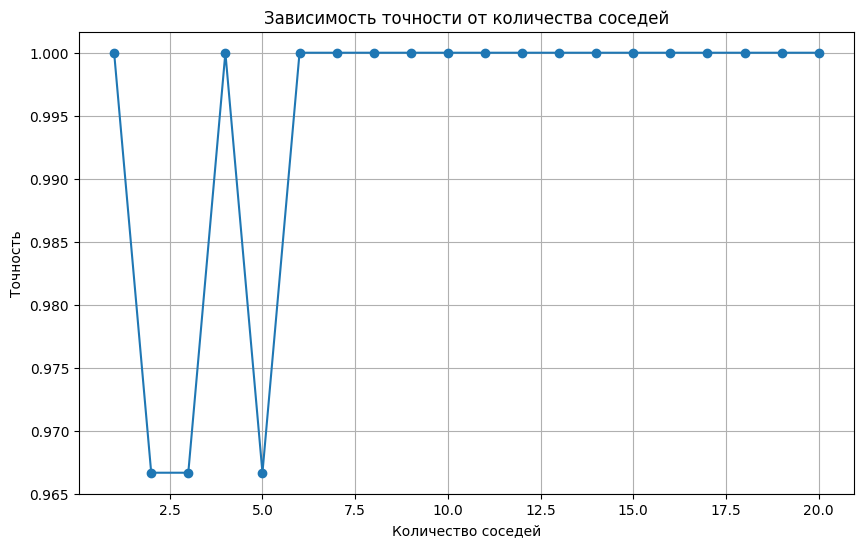

In [ ]:
import matplotlib.pyplot as plt

k_values = list(range(1, 21))
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('Количество соседей')
plt.ylabel('Точность')
plt.title('Зависимость точности от количества соседей')
plt.grid(True)
plt.show()


### 2. KNN рукописный

#### 2.1. Возьмите два случайных тестовых объектов

In [ ]:
test_objects = X_test[:2]

#### 2.2. Посчитайте для каждого расстояния до всех объектов из обучения

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

distances, indices = knn.kneighbors(test_objects)

#### 2.3. Выберите топ $k$ соседей для каждого объекта

In [ ]:
for i in range(2):
    print(f"Тестовый объект {i + 1}:")
    print(f"Ближайшие соседи: {distances[i]}")
    print(f"Их индексы: {indices[i]}")

Тестовый объект 1:
Ближайшие соседи: [0.50990195 0.50990195 0.51961524]
Их индексы: [107  32  64]
Тестовый объект 2:
Ближайшие соседи: [0.48989795 0.51961524 0.54772256]
Их индексы: [  9  20 117]


#### 2.4. Выведите финальное предсказание для двух объектов основываясь на соседях

In [ ]:
predictions = knn.predict(test_objects)
true_labels = y_test[:2]

for i in range(2):
    print(f"Тестовый объект {i + 1}:")
    print(f"Предсказание: {predictions[i]}, Факт: {true_labels[i]}")

Тестовый объект 1:
Предсказание: 2, Факт: 2
Тестовый объект 2:
Предсказание: 1, Факт: 1


## KNN для регрессии

### Получение данных


Будем работать с набором данных для задачи регрессии - данные по предсказанию стоимости недвижимости.

In [ ]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np


data = fetch_california_housing()
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data['target']

X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


### KNN из sklearn

#### 3.1. Разбейте данные на обучение и тест

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Затем нормализуйте данные:

In [ ]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(X_train)

X_train = pd.DataFrame(mms.transform(X_train[X_train.columns]), columns=X_train.columns)
X_test = pd.DataFrame(mms.transform(X_test[X_train.columns]), columns=X_train.columns)

#### 3.2. Обучите модель KNN


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

model = KNeighborsRegressor(n_neighbors=5)

model.fit(X_train, y_train)

KNeighborsRegressor()

#### 3.3. Проверьте качество работы модели

In [ ]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mse

0.39562896931791564

#### 3.4. Поэкспериментируйте с количеством соседей

1. Обучите модели с разным кол-вом соседей
2. Посчитайте метрику на тестовой выборке
3. Соберите данные в таблицу/график для наглядности
4. Выберите самое оптимальное значение $k$

In [ ]:
k_values = list(range(1, 21))
mse = []

for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = mean_squared_error(y_test, y_pred)
    mse.append(r2)

result = pd.DataFrame({'k': k_values, 'mse': mse})

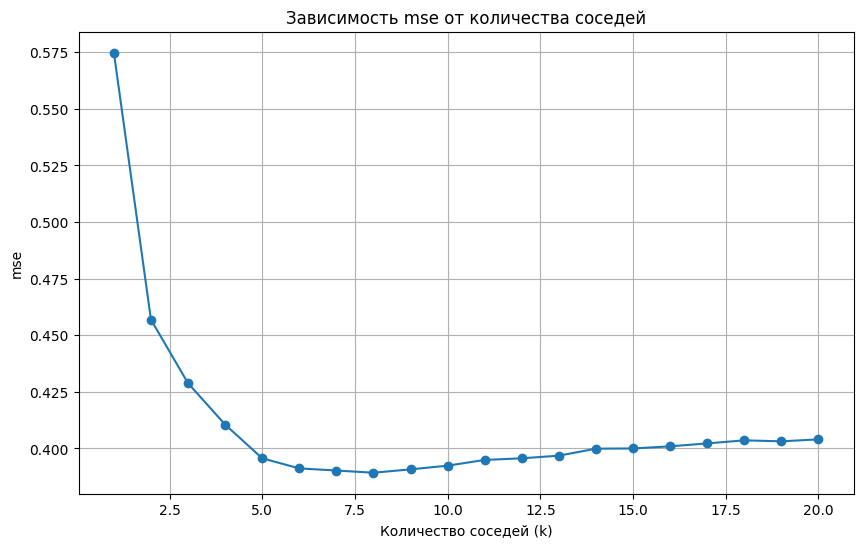

     k       mse
0    1  0.574789
1    2  0.456869
2    3  0.428792
3    4  0.410537
4    5  0.395629
5    6  0.391171
6    7  0.390233
7    8  0.389260
8    9  0.390748
9   10  0.392377
10  11  0.394911
11  12  0.395625
12  13  0.396794
13  14  0.399883
14  15  0.399979
15  16  0.400914
16  17  0.402206
17  18  0.403565
18  19  0.403128
19  20  0.403987


In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, mse, marker='o', linestyle='-')
plt.xlabel('Количество соседей (k)')
plt.ylabel('mse')
plt.title('Зависимость mse от количества соседей')
plt.grid(True)
plt.show()

print(result)

Самое оптимальное значение k=7

### 4. KNN рукописный

#### 4.1. Возьмите два случайных тестовых объектов

In [ ]:
test_objects = X_test[:2]


#### 4.2. Посчитайте для каждого расстояния до всех объектов из обучения

In [ ]:
model = KNeighborsRegressor(n_neighbors=3)
model.fit(X_train, y_train)
distances, indices = model.kneighbors(test_objects)


#### 4.3. Выберите топ $k$ соседей для каждого объекта

In [ ]:
for i in range(2):
    print(f"Тестовый объект {i + 1}:")
    print(f"Ближайшие соседи: {distances[i]}")
    print(f"Их индексы: {indices[i]}")


Тестовый объект 1:
Ближайшие соседи: [0.01570717 0.02073032 0.02874702]
Их индексы: [2115 2927 2471]
Тестовый объект 2:
Ближайшие соседи: [0.01970641 0.02229572 0.03073945]
Их индексы: [6991  390 9758]


#### 4.4. Выведите финальное предсказание для двух объектов основываясь на соседях

In [ ]:
predictions = model.predict(test_objects)
predictions

array([1.304     , 2.34033333])

#### 4.5. Сравните с настоящими целевыми значениями этих двух объектов

In [ ]:
true_values = y_test[:2]
for i in range(2):
    print(f"Тестовый объект {i + 1}:")
    print(f"Предсказание: {predictions[i]}, Факт: {true_values[i]}")

Тестовый объект 1:
Предсказание: 1.304, Факт: 1.369
Тестовый объект 2:
Предсказание: 2.340333333333333, Факт: 2.413


Предсказания отклоняются от истины, но не так сильно, они довольно близки.

# Weighted KNN

## KNN для классификации

### Получение данных

Будем работать с набором данным `iris` из `sklearn`.

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd


data = load_iris()

X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data['target']

X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Выберите только 0 и 3 признак (sepal length (cm) и petal width (cm))

In [ ]:
Xs = X[['sepal length (cm)', 'petal width (cm)']]


### Визуализируйте ваши данные на графике

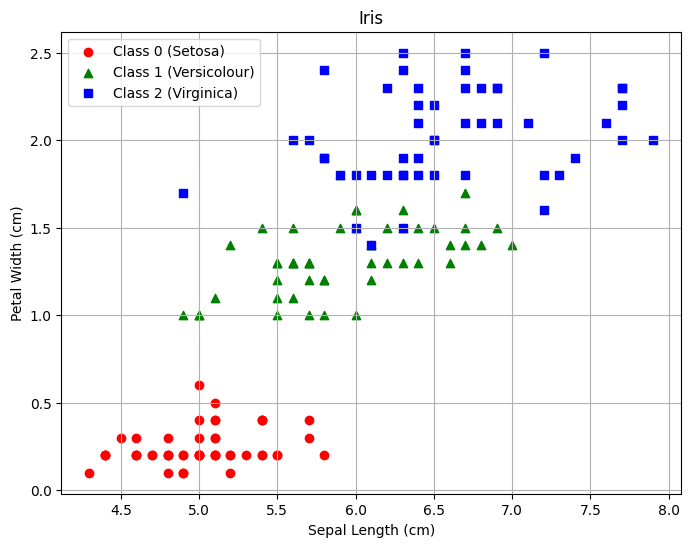

In [ ]:
import matplotlib.pyplot as plt

class_0 = Xs[y == 0]
class_1 = Xs[y == 1]
class_2 = Xs[y == 2]

plt.figure(figsize=(8, 6))
plt.scatter(class_0.iloc[:, 0], class_0.iloc[:, 1], label='Class 0 (Setosa)', c='red', marker='o')
plt.scatter(class_1.iloc[:, 0], class_1.iloc[:, 1], label='Class 1 (Versicolour)', c='green', marker='^')
plt.scatter(class_2.iloc[:, 0], class_2.iloc[:, 1], label='Class 2 (Virginica)', c='blue', marker='s')

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Iris')
plt.legend()
plt.grid(True)
plt.show()

### 1. KNN из sklearn

#### 1.1. Разбейте данные на обучение и тест

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.2, random_state=0)



#### 1.2. Обучите модель KNN на 50 соседях

In [ ]:
model = KNeighborsClassifier(n_neighbors=50)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#### 1.3. Проверьте качество работы модели

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8

#### 1.4. Возьмите один случайный тестовый объект и посчитайте для него расстояния до всех объектов с обучения

In [ ]:
import numpy as np
from matplotlib.colors import ListedColormap

selected_test_index = 0
selected_test_object = X_test.iloc[selected_test_index].values.reshape(1, -1)

distances = pd.DataFrame()
distances, indices = model.kneighbors(selected_test_object)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


#### 1.5. Выберите топ  k  соседей


In [ ]:
k = 5
top_k_indices = indices[0][:k]

top_k_indices


array([ 64,  62, 107,  96,  32])

#### 1.6. Выведите финальное предсказание для этого объекта

In [ ]:
final_prediction = model.predict(selected_test_object)
print("Финальное предсказание:", final_prediction[0])

Финальное предсказание: 2


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


#### 1.7. Сравните с настоящим целевым значением и предсказанием модели из `sklearn`

In [ ]:
true_value = y_test[0]
print("Настоящее целевое значение:", true_value)
print("Финальное предсказание:", final_prediction[0])

Настоящее целевое значение: 2
Финальное предсказание: 2


#### 1.8 Визуализируйте точки с обучения и тестовую с отрисовкой ближайших соседей

<ipython-input-109-97acf97bdaa8>:15: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.scatterplot(x='Sepal Length (cm)', y='Petal Width (cm)', hue='Type', data=data, palette=['red'] + ['blue'] * k_neighbors, s=200, marker='o', edgecolor='black', linewidth=1, legend=False)


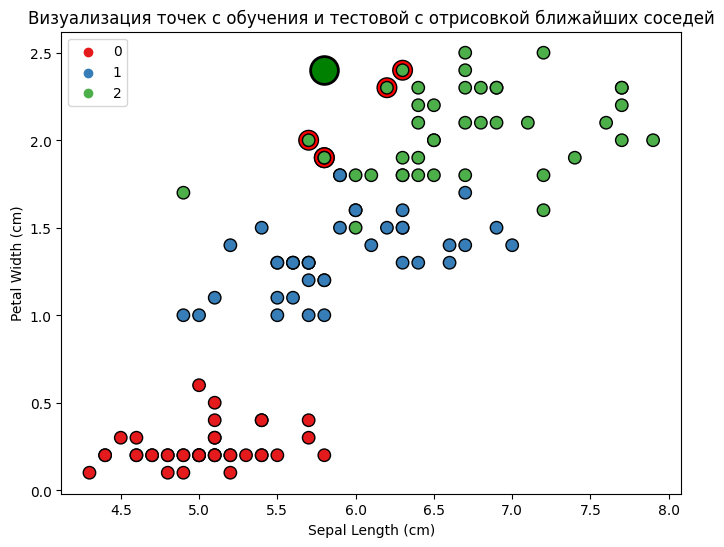

In [ ]:
import seaborn as sns

neighbors_data = []
for i in range(k):
    neighbor_index = indices[selected_test_index, i]
    neighbor = X_train.iloc[neighbor_index, :]
    neighbors_data.append(neighbor.tolist())

neighbors_data.append(selected_test_object[0].tolist())

data = pd.DataFrame(neighbors_data, columns=['Sepal Length (cm)', 'Petal Width (cm)'])
data['Type'] = ['Neighbor'] * k + ['Test Object']

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Sepal Length (cm)', y='Petal Width (cm)', hue='Type', data=data, palette=['red'] + ['blue'] * k_neighbors, s=200, marker='o', edgecolor='black', linewidth=1, legend=False)
sns.scatterplot(x=X_train.iloc[:, 0], y=X_train.iloc[:, 1], hue=y_train, palette='Set1', s=80, marker='o', edgecolor='black', linewidth=1)

sns.scatterplot(x='Sepal Length (cm)', y='Petal Width (cm)', data=data[data['Type'] == 'Test Object'], color='green', marker='o', s=400, linewidth=2, edgecolor='black')

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Визуализация точек с обучения и тестовой с отрисовкой ближайших соседей')
plt.show()

### 2. Weighted KNN

#### 2.1. Обучите модель "взвешенный KNN" по дистанции

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5, weights='distance')

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#### 2.2. Проверьте качество работы модели


In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9333333333333333

#### 2.3. Возьмите тот же случайный тестовый объект и посчитайте для него расстояния до всех объектов с обучения

In [ ]:
from sklearn.metrics import pairwise_distances
selected_test_object = X_test.iloc[0].values.reshape(1, -1)
distances = pairwise_distances(selected_test_object, X_train)
distances

array([[0.84852814, 0.98488578, 2.28035085, 0.67082039, 0.63245553,
        1.16619038, 2.1023796 , 0.82462113, 0.90553851, 1.2       ,
        1.04403065, 2.45967478, 1.1045361 , 1.96977156, 2.23606798,
        1.61245155, 0.92195445, 0.90553851, 0.92195445, 1.08166538,
        1.31529464, 1.90262976, 0.94339811, 1.33416641, 0.78102497,
        1.02956301, 1.14017543, 0.70710678, 1.56204994, 0.80622577,
        0.82462113, 2.41660919, 0.5       , 1.11803399, 1.11803399,
        1.14017543, 1.04403065, 1.52315462, 2.25610283, 2.74590604,
        0.78102497, 1.20415946, 2.23606798, 2.00249844, 1.42126704,
        2.50599282, 0.60827625, 1.47648231, 2.41867732, 0.98488578,
        1.40356688, 1.1045361 , 2.50798724, 1.33416641, 1.1045361 ,
        0.72801099, 0.67082039, 2.30867928, 2.41660919, 0.80622577,
        0.9486833 , 2.46981781, 0.41231056, 2.37697286, 0.41231056,
        1.14017543, 2.60768096, 2.34093998, 1.61245155, 2.21359436,
        2.60768096, 2.03960781, 1.14017543, 1.00

#### 2.4. Выберите топ  k  соседей


In [ ]:
import numpy as np
k_neighbors = 5
indices = np.argsort(distances)[:, :k_neighbors]
indices


array([[ 64,  62,  96,  32, 107]])

#### 2.5. Рассчитайте вес для каждого соседа

In [ ]:
weights = 1 / distances[0, indices[0]]
weights

array([2.42535625, 2.42535625, 2.        , 2.        , 2.        ])

#### 2.6. Выведите финальное предсказание для этого объекта

In [ ]:
weighted_prediction = np.argmax(np.bincount(y_train[indices[0]], weights=weights))
print("Взвешенный KNN:", weighted_prediction)

Взвешенный KNN: 2


#### 2.7. Сравните с настоящим целевым значением и предсказанием модели из `sklearn`

In [ ]:
true_target_value = y_test[0]
print("Взвешенный KNN:", weighted_prediction)
print("Целевое значение:", true_target_value)

Взвешенный KNN: 2
Целевое значение: 2


#### 2.8. Визуализируйте точки с обучения и тестовую с отрисовкой ближайших соседей по удаленности

<ipython-input-65-d55ebe52b16b>:21: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.scatterplot(x='Sepal Length (cm)', y='Petal Width (cm)', hue='Type', data=data, palette=['red'] + ['blue'] * k_neighbors, s=sizes, marker='o', alpha=0.5, legend=False)


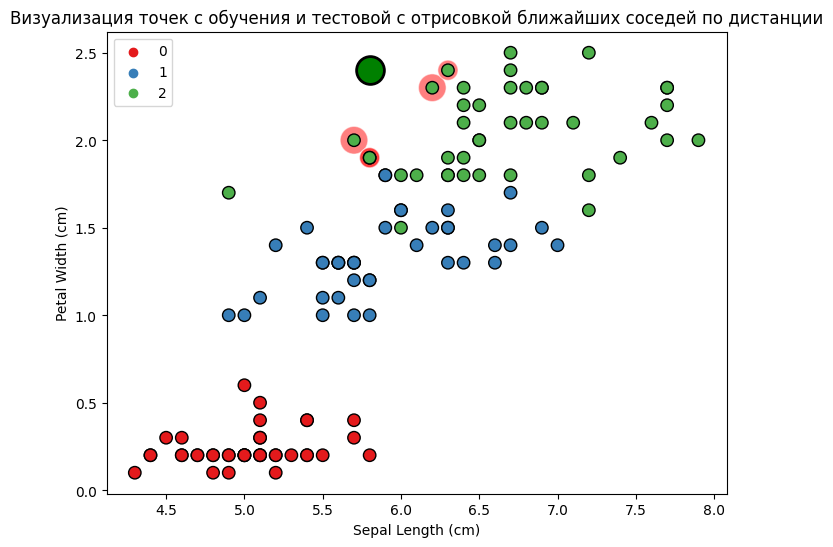

In [ ]:
import seaborn as sns

neighbors_data = []
for i in range(5):
    neighbor_index = indices[i]
    neighbor = X_train.iloc[neighbor_index, :]
    neighbors_data.append(neighbor.tolist())

neighbors_data.append(selected_test_object[0].tolist())

data = pd.DataFrame(neighbors_data, columns=['Sepal Length (cm)', 'Petal Width (cm)'])
data['Type'] = ['Neighbor'] * 5 + ['Test Object']

plt.figure(figsize=(8, 6))
sizes = []
#print(weights)
for i in range(5):
    sizes.append(50+(weights[i]**4)*10)
    #print(sizes)
sizes.append(1)
sns.scatterplot(x='Sepal Length (cm)', y='Petal Width (cm)', hue='Type', data=data, palette=['red'] + ['blue'] * k_neighbors, s=sizes, marker='o', alpha=0.5, legend=False)
sns.scatterplot(x=X_train.iloc[:, 0], y=X_train.iloc[:, 1], hue=y_train, palette='Set1', s=80, marker='o', edgecolor='black', linewidth=1)

sns.scatterplot(x='Sepal Length (cm)', y='Petal Width (cm)', data=data[data['Type'] == 'Test Object'], color='green', marker='o', s=400, linewidth=2, edgecolor='black')

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Визуализация точек с обучения и тестовой с отрисовкой ближайших соседей по дистанции')
plt.show()

## 3. Еще одна задача классификации

### Получение данных

Будем работать с набором данным `fetch_olivetti_faces` из `sklearn`.

In [ ]:
from sklearn.datasets import fetch_olivetti_faces
import pandas as pd


data = fetch_olivetti_faces(shuffle=True, random_state=9)

X = pd.DataFrame(data['data'])
y = data['target']

X.head()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0.723140,0.710744,0.714876,0.731405,0.735537,0.752066,0.772727,0.793388,0.814050,0.834711,...,0.793388,0.904959,0.549587,0.409091,0.491736,0.487603,0.471074,0.483471,0.475207,0.475207
1,0.289256,0.157025,0.148760,0.190083,0.169421,0.194215,0.404959,0.607438,0.669421,0.677686,...,0.438017,0.400826,0.421488,0.429752,0.433884,0.425620,0.438017,0.438017,0.210744,0.206612
2,0.586777,0.595041,0.681818,0.694215,0.714876,0.698347,0.714876,0.727273,0.743802,0.739669,...,0.495868,0.380165,0.400826,0.330579,0.148760,0.119835,0.123967,0.115702,0.119835,0.107438
3,0.235537,0.351240,0.479339,0.545455,0.566116,0.566116,0.595041,0.607438,0.619835,0.623967,...,0.169421,0.198347,0.202479,0.214876,0.202479,0.214876,0.214876,0.214876,0.210744,0.206612
4,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,0.698347,...,0.074380,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893


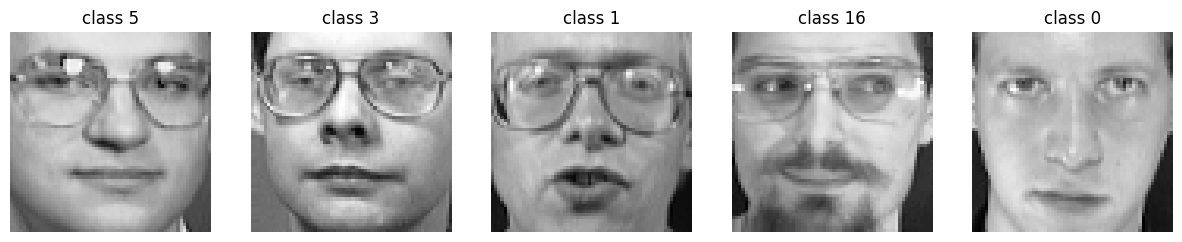

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 5, figsize=(15, 8))

for i in range(0, 5):
    ax[i].imshow(X.iloc[i].values.reshape((64, 64)), cmap='gray')
    ax[i].axis('off')
    ax[i].set_title(f'class {y[i]}')

plt.show()

In [ ]:
y

array([ 5,  3,  1, 16,  0,  1, 12,  9, 26, 37, 20,  5, 10, 27, 10, 34, 13,
       26, 17, 31,  9,  7, 31, 37, 31, 35, 18, 29, 29,  4, 21, 20, 23,  7,
        9, 18, 22,  2,  1, 39, 36,  8, 34, 32,  3, 20,  3,  9, 37, 32, 34,
       15,  9, 16, 36, 16, 13,  7, 29,  6, 13,  4, 16,  0,  8,  1, 25,  3,
       18, 29,  8, 35,  2, 25, 21, 31, 35, 23, 30, 28,  4, 10, 11, 27, 29,
       39,  5, 12, 29, 26, 15,  2, 39,  6, 30, 37, 25, 32, 35, 24, 15, 24,
        2, 19, 22,  0, 38,  5, 22, 28,  6, 38,  6,  3, 33, 12, 36,  8, 27,
       19, 25, 36, 10, 37,  9, 33, 10, 28, 32, 34, 17, 23, 19, 24, 27,  3,
       39, 30,  3,  7,  3, 30, 12, 21, 17, 14, 35, 21, 19,  5, 32, 16, 19,
        8, 33, 14, 17, 15, 22, 38, 15, 18,  7, 14, 28, 39, 23, 36, 28, 10,
       39, 36, 37, 10, 34, 25, 18, 13, 19, 33, 33, 13, 26,  9, 13, 34, 24,
        0, 30, 23,  2, 22,  9, 11,  7, 35, 19, 26, 32, 11,  7,  7,  0,  4,
        0,  2,  0, 26, 21, 14,  4, 32,  1, 23, 16,  0,  7, 14, 16, 15, 39,
       17, 33, 30, 37, 17

### 3.1. KNN из sklearn

#### 3.1.1. Разбейте данные на обучение и тест

In [ ]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### 3.1.2. Обучите модель KNN на 50 соседях

In [ ]:
model = KNeighborsClassifier(n_neighbors=50)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=50)

#### 3.1.3. Проверьте качество работы модели


In [ ]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)

# Вычисляем accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.225


### 3.2. Weighted KNN

#### 3.2.1. Обучите модель взвешенный KNN по дистанции

In [ ]:
w_model = KNeighborsClassifier(n_neighbors=50, weights='distance')
w_model.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=50, weights='distance')

#### 3.2.2. Проверьте качество работы модели


In [ ]:
w_y_pred = w_model.predict(X_test)

w_accuracy = accuracy_score(y_test, w_y_pred)
print(f'Accuracy: {w_accuracy}')

Accuracy: 0.525


### 3.3. Custom Weighted KNN

#### 3.3.1. Напишите свою функцию подсчета весов по дистанции

(Можете выбрать любой подход)

In [ ]:
def custom(distances):
    e = 1e-6
    weights = 1 / (distances + e)
    weights /= weights.sum()
    return weights

w_custom = KNeighborsClassifier(n_neighbors=50, weights=custom)

#### 3.3.2. Обучите модель взвешенный KNN по написанной функции выше

In [ ]:
w_custom.fit(X_train, y_train)
w_custom_y_pred = w_custom.predict(X_test)

#### 3.3.3. Проверьте качество работы модели


In [ ]:
c_accuracy = accuracy_score(y_test, w_custom_y_pred)
print(f'Accuracy: {c_accuracy}')

Accuracy: 0.525


## KNN для регрессии

### Получение данных


Будем работать с набором данных для задачи регрессии - данные по предсказанию стоимости недвижимости.

In [ ]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np


data = fetch_california_housing()
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data['target']

X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [ ]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

### Возьмите только признак MedInc и 1000 первых строк

In [ ]:
X = pd.DataFrame(data['data'], columns=data['feature_names'])[['MedInc']][:1000]
y = data['target'][:1000]


### Отрисуйте данные на графике

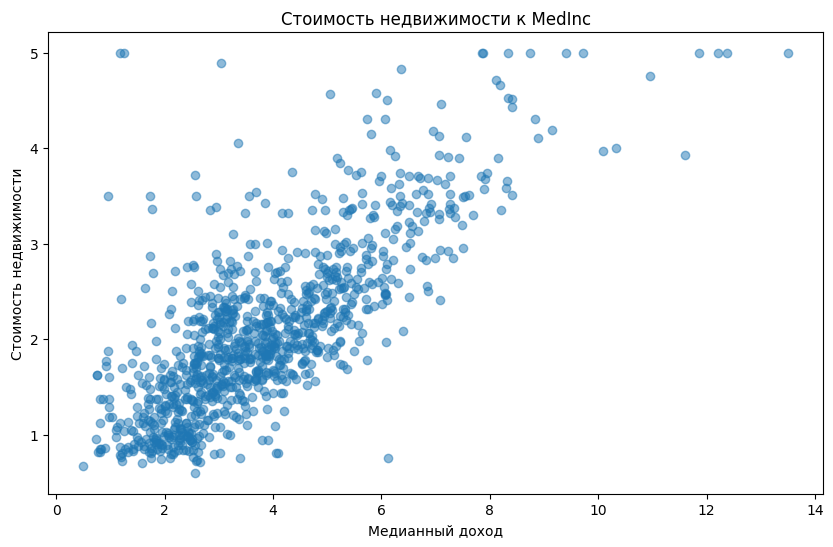

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5)
plt.title('Стоимость недвижимости к MedInc')
plt.xlabel('Медианный доход')
plt.ylabel('Стоимость недвижимости')
plt.show()

### 4. KNN из sklearn

#### 4.1. Разбейте данные на обучение и тест

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


#### 4.2. Обучите модель KNN на 100 соседях


In [129]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=100)
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=100)

#### 4.3. Проверьте качество работы модели


In [130]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Среднеквадратичная ошибка: {mse}')

Среднеквадратичная ошибка: 0.45281004085363236


#### 4.4. Возьмите один случайный тестовый объект и посчитайте для него расстояния до всех объектов с обучения

In [131]:
random_test_object = X_test.iloc[0]

distances, indices = model.kneighbors([random_test_object])

for i, distance in enumerate(distances.flatten()):
    print(f'Сосед {i+1}: Расстояние = {distance}')

Сосед 1: Расстояние = 0.002400000000000624
Сосед 2: Расстояние = 0.008100000000000662
Сосед 3: Расстояние = 0.016000000000000014
Сосед 4: Расстояние = 0.019899999999999807
Сосед 5: Расстояние = 0.027399999999999203
Сосед 6: Расстояние = 0.03559999999999963
Сосед 7: Расстояние = 0.0356999999999994
Сосед 8: Расстояние = 0.03620000000000001
Сосед 9: Расстояние = 0.04190000000000005
Сосед 10: Расстояние = 0.044899999999999274
Сосед 11: Расстояние = 0.052200000000000024
Сосед 12: Расстояние = 0.052700000000000635
Сосед 13: Расстояние = 0.07170000000000076
Сосед 14: Расстояние = 0.07209999999999983
Сосед 15: Расстояние = 0.07469999999999999
Сосед 16: Расстояние = 0.08289999999999953
Сосед 17: Расстояние = 0.09489999999999998
Сосед 18: Расстояние = 0.09729999999999972
Сосед 19: Расстояние = 0.11560000000000059
Сосед 20: Расстояние = 0.1402000000000001
Сосед 21: Расстояние = 0.1462999999999992
Сосед 22: Расстояние = 0.16779999999999973
Сосед 23: Расстояние = 0.18150000000000066
Сосед 24: Расст

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


#### 4.5. Выберите топ  k  соседей


In [132]:
k = 100
model = KNeighborsRegressor(n_neighbors=k)
model.fit(X_train, y_train)
distances, indices = model.kneighbors([random_test_object])
neighbor_targets = y_train[indices.flatten()]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


#### 4.6. Выведите финальное предсказание для этого объекта

In [133]:
final_prediction = neighbor_targets.mean()
print(final_prediction)

2.9280500000000003


#### 4.7. Сравните с настоящим целевым значением и предсказанием модели из `sklearn`

In [134]:
print(f'Финальное предсказание: {final_prediction}')
print(f'Финальное предсказание: {y_test[0]}')

Финальное предсказание: 2.9280500000000003
Финальное предсказание: 4.5


#### 4.8 Визуализируйте точки с обучения и тестовую с отрисовкой ближайших соседей

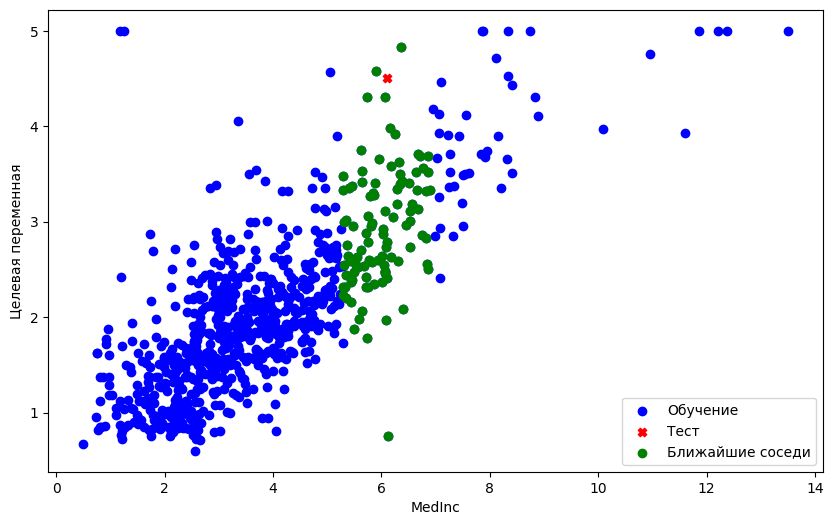

In [136]:
import matplotlib.pyplot as plt
import numpy as np

X_train_values = X_train.values
X_test_value = random_test_object['MedInc']

plt.figure(figsize=(10, 6))
plt.scatter(X_train_values, y_train, color='blue', label='Обучение')
plt.scatter(X_test_value, y_test[0], color='red', marker='X', label='Тест')

plt.scatter(X_train_values[indices], y_train[indices.flatten()], color='green', label='Ближайшие соседи')
plt.xlabel('MedInc')
plt.legend()
plt.show()


### 5. Weighted KNN

#### 5.1. Обучите модель взвешенный KNN по дистанции

In [163]:
w_model = KNeighborsRegressor(n_neighbors=100, weights='distance')

#### 5.2. Проверьте качество работы модели


In [164]:
w_model.fit(X_train, y_train)

w_y_pred = w_model.predict(X_test)

mse = mean_squared_error(y_test, w_y_pred)
print(f'Среднеквадратичная ошибка: {mse}')

Среднеквадратичная ошибка: 0.4656353431587814


#### 5.3. Возьмите тот же случайный тестовый объект и посчитайте для него расстояния до всех объектов с обучения

In [140]:
random_test_object = X_test.iloc[0]

distances, indices = w_model.kneighbors([random_test_object])

for i, distance in enumerate(distances.flatten()):
    print(f'Сосед {i+1}: Расстояние = {distance}')


Сосед 1: Расстояние = 0.002400000000000624
Сосед 2: Расстояние = 0.008100000000000662
Сосед 3: Расстояние = 0.016000000000000014
Сосед 4: Расстояние = 0.019899999999999807
Сосед 5: Расстояние = 0.027399999999999203
Сосед 6: Расстояние = 0.03559999999999963
Сосед 7: Расстояние = 0.0356999999999994
Сосед 8: Расстояние = 0.03620000000000001
Сосед 9: Расстояние = 0.04190000000000005
Сосед 10: Расстояние = 0.044899999999999274
Сосед 11: Расстояние = 0.052200000000000024
Сосед 12: Расстояние = 0.052700000000000635
Сосед 13: Расстояние = 0.07170000000000076
Сосед 14: Расстояние = 0.07209999999999983
Сосед 15: Расстояние = 0.07469999999999999
Сосед 16: Расстояние = 0.08289999999999953
Сосед 17: Расстояние = 0.09489999999999998
Сосед 18: Расстояние = 0.09729999999999972
Сосед 19: Расстояние = 0.11560000000000059
Сосед 20: Расстояние = 0.1402000000000001
Сосед 21: Расстояние = 0.1462999999999992
Сосед 22: Расстояние = 0.16779999999999973
Сосед 23: Расстояние = 0.18150000000000066
Сосед 24: Расст

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


#### 5.4. Выберите топ  k  соседей


In [165]:
k = 100
w_model = KNeighborsRegressor(n_neighbors=k)
w_model.fit(X_train, y_train)
distances, indices = w_model.kneighbors([random_test_object])
neighbor_targets = y_train[indices.flatten()]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


#### 5.5. Рассчитайте вес для каждого соседа

In [157]:
def custom(distances):
    e = 1e-6
    weights = 1 / (distances + e)
    weights /= weights.sum()
    return weights

w_model2 = KNeighborsRegressor(n_neighbors=k, weights=custom)
w_model2.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=100,
                    weights=<function custom at 0x7e370c2969e0>)

#### 5.6. Выведите финальное предсказание для этого объекта

In [166]:
w_pred = w_model2.predict([random_test_object])


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


#### 5.7. Сравните с настоящим целевым значением и предсказанием модели из `sklearn`

In [167]:
print(f'Финальное предсказание: {w_pred}')
print(f'Финальное предсказание: {y_test[0]}')


Финальное предсказание: [2.92805]
Финальное предсказание: 4.5


#### 5.8. Визуализируйте точки с обучения и тестовую с отрисовкой ближайших соседей по удаленности

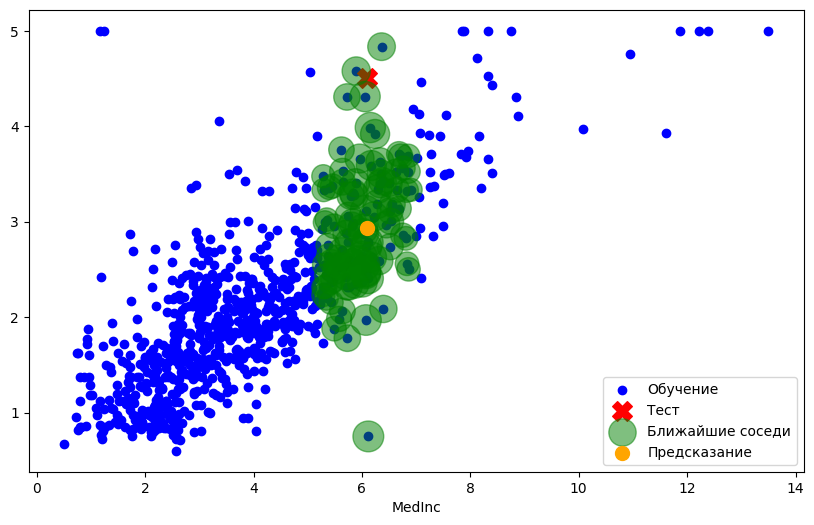

In [169]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train_values, y_train, color='blue', label='Обучение')
plt.scatter(X_test_value, y_test[0], color='red', marker='X', s=200, label='Тест')

plt.scatter(X_train_values[indices], y_train[indices.flatten()], color='green', s=500 / (distances.flatten() + 1), alpha=0.5, label='Ближайшие соседи')

plt.scatter(X_test_value, w_pred, color='orange', marker='o', s=100, label='Предсказание')

plt.xlabel('MedInc')
plt.legend()
plt.show()


## 6. Еще одна задача регрессии

### Получение данных

Будем работать с тем же самым набором данным `fetch_olivetti_faces` из `sklearn`, но уже для задачи регрессии - будем восстанавливать изображение.

In [2]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_olivetti_faces
import pandas as pd


data, _ = fetch_olivetti_faces(return_X_y=True)
train, test = train_test_split(data, test_size=0.2, random_state=4)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


Поделим данные на X и y, где X - это верхняя часть лица человека, на этом модель будет обучаться, а y - это нижняя часть лица человека - её будем предсказывать.

In [3]:
n_pixels = data.shape[1]

# Upper half of the faces
X_train = train[:, :(n_pixels + 1) // 2]
# Lower half of the faces
y_train = train[:, n_pixels // 2:]


X_test = test[:, :(n_pixels + 1) // 2]
y_test = test[:, n_pixels // 2:]

Вот один пример обучающей пары.

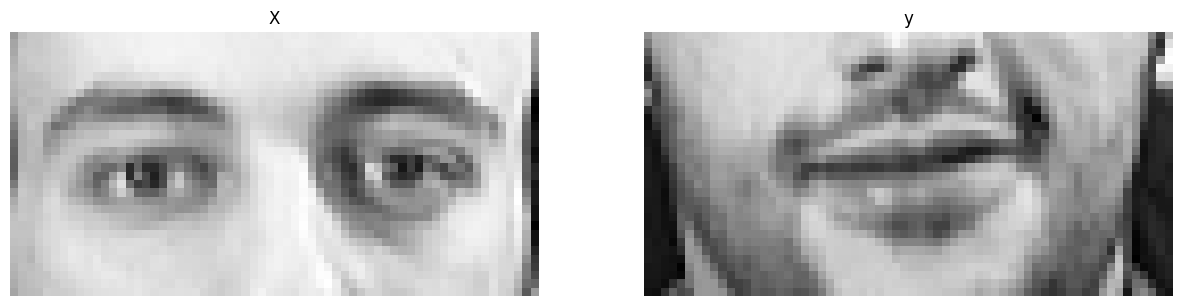

In [4]:
import matplotlib.pyplot as plt

idx = 0

fig, ax = plt.subplots(1, 2, figsize=(15, 8))
ax[0].imshow(X_train[idx].reshape((32, 64)), cmap='gray')
ax[0].set_title('X')
ax[1].imshow(y_train[idx].reshape((32, 64)), cmap='gray')
ax[1].set_title('y')
ax[0].axis('off')
ax[1].axis('off')

plt.show()

#### 6.1. Обучите модель KNN и назовите переменную с моделью knn на 100 соседях

In [6]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=100)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=100)

#### 6.2. Проверьте качество работы модели

При этом предсказания модели запишите в словарь pred_test с ключом knn.


In [7]:
pred_test = {'knn': None,
             'weighted_knn': None,
             'weighted_knn_custom': None}

In [9]:
from sklearn.metrics import mean_squared_error

knn_predictions = knn.predict(X_test)
mse = mean_squared_error(y_test, knn_predictions)
print(f'MSE {mse}')
pred_test = {
    'knn': knn_predictions,
    'weighted_knn': None,
    'weighted_knn_custom': None}

MSE 0.01594657078385353


#### 6.3. Обучите модель KNN с весами по дистанции и назовите переменную с моделью weighted_knn на 100 соседях

In [10]:
weighted_knn = KNeighborsRegressor(n_neighbors=100, weights='distance')
weighted_knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=100, weights='distance')

#### 6.4. Проверьте качество работы модели

При этом предсказания модели запишите в словарь pred_test с ключом weighted_knn.


In [11]:
weighted_knn_predictions = weighted_knn.predict(X_test)
mse = mean_squared_error(y_test, weighted_knn_predictions)
print(f'MSE {mse}')
pred_test = {
    'knn': knn_predictions,
    'weighted_knn': weighted_knn_predictions,
    'weighted_knn_custom': None}


MSE 0.015302634801124326


#### 6.5. Напишите свою функцию подсчета весов по дистанции

(Можете выбрать любой подход)


In [12]:
def custom(distances):
    e = 1e-6
    weights = 1 / (distances + e)
    weights /= weights.sum()
    return weights





#### 6.6. Обучите модель KNN с кастомными весами по дистанции и назовите переменную с моделью weighted_knn_custom на 100 соседях

In [13]:
weighted_knn_custom_model = KNeighborsRegressor(n_neighbors=100, weights=custom)
weighted_knn_custom_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=100,
                    weights=<function custom at 0x7aa4ee5a2050>)

#### 6.7. Проверьте качество работы модели

При этом предсказания модели запишите в словарь pred_test с ключом weighted_knn_custom.


In [14]:
weighted_knn_custom_predictions = weighted_knn_custom_model.predict(X_test)
mse = mean_squared_error(y_test, weighted_knn_custom_predictions)
print(f'MSE {mse}')
pred_test = {
    'knn': knn_predictions,
    'weighted_knn': weighted_knn_predictions,
    'weighted_knn_custom': weighted_knn_custom_predictions}


MSE 0.015302634978463552


А сейчас отрисуем все предсказания.

In [15]:
ESTIMATORS = {'knn': knn,
              'weighted_knn': weighted_knn,
              'weighted_knn_custom': weighted_knn_custom_predictions}

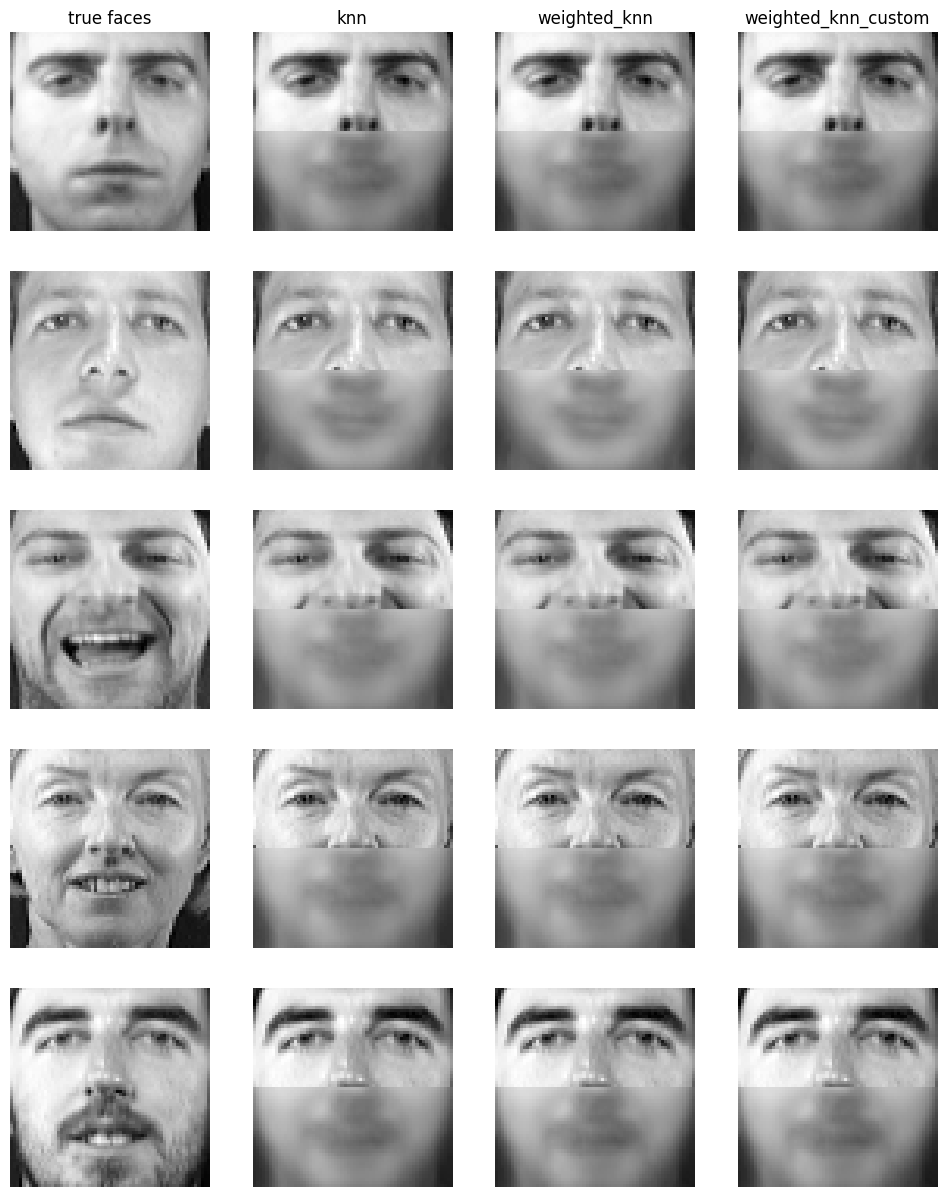

In [16]:
n_faces = 5
n_cols = 1 + len(ESTIMATORS)
image_shape = (64, 64)
plt.figure(figsize=(3 * n_cols, 3 * n_faces))


for i in range(5):
    true_face = np.hstack((X_test[i], y_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1, title="true faces")

    sub.axis("off")
    sub.imshow(
        true_face.reshape(image_shape), cmap=plt.cm.gray, interpolation="nearest"
    )

    for j, est in enumerate(sorted(ESTIMATORS)):
        completed_face = np.hstack((X_test[i], pred_test[est][i]))

        if i:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j)

        else:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j, title=est)

        sub.axis("off")
        sub.imshow(
            completed_face.reshape(image_shape),
            cmap=plt.cm.gray,
            interpolation="nearest",
        )

#### 7*. Подберите лучшие гиперпараметры для модели, используя метод [GridSearchCV](https://scikit-learn.org/stable/modules/grid_search.html)

Примеры использования можно найти в технической документации, а также в следующих источниках:

[Пример 1](https://machinelearningknowledge.ai/knn-classifier-in-sklearn-using-gridsearchcv-with-example/#vii_Model_fitting_with_K-cross_Validation_and_GridSearchCV)


[Пример 2](https://vc.ru/ml/147132-kak-avtomaticheski-podobrat-parametry-dlya-modeli-mashinnogo-obucheniya-ispolzuem-gridsearchcv)

In [18]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [50, 100, 150],
    'weights': ['distance'],
    'p': [1, 2] # p (1 - манхэттенское расстояние, 2 - евклидово расстояние)
}

knn = KNeighborsRegressor()

grid_search = GridSearchCV(knn, param_grid, scoring='neg_mean_squared_error', cv=5)

grid_search.fit(X_train, y_train)

print("Лучшие гиперпараметры: ", grid_search.best_params_)
print(f"Лучшая оценка: {grid_search.best_score_}")




Лучшие гиперпараметры:  {'n_neighbors': 50, 'p': 1, 'weights': 'distance'}
Лучшая оценка: -0.014412055450162964


In [21]:
grid_search_pred = grid_search.predict(X_test)
mse = mean_squared_error(y_test, grid_search_pred)
print(f'MSE {mse}')
ESTIMATORS = {
    'knn': knn_predictions,
    'weighted_knn': weighted_knn_predictions,
    'weighted_knn_custom': weighted_knn_custom_predictions,
    'grid_search': grid_search_pred}

pred_test = ESTIMATORS


MSE 0.013828199900444187


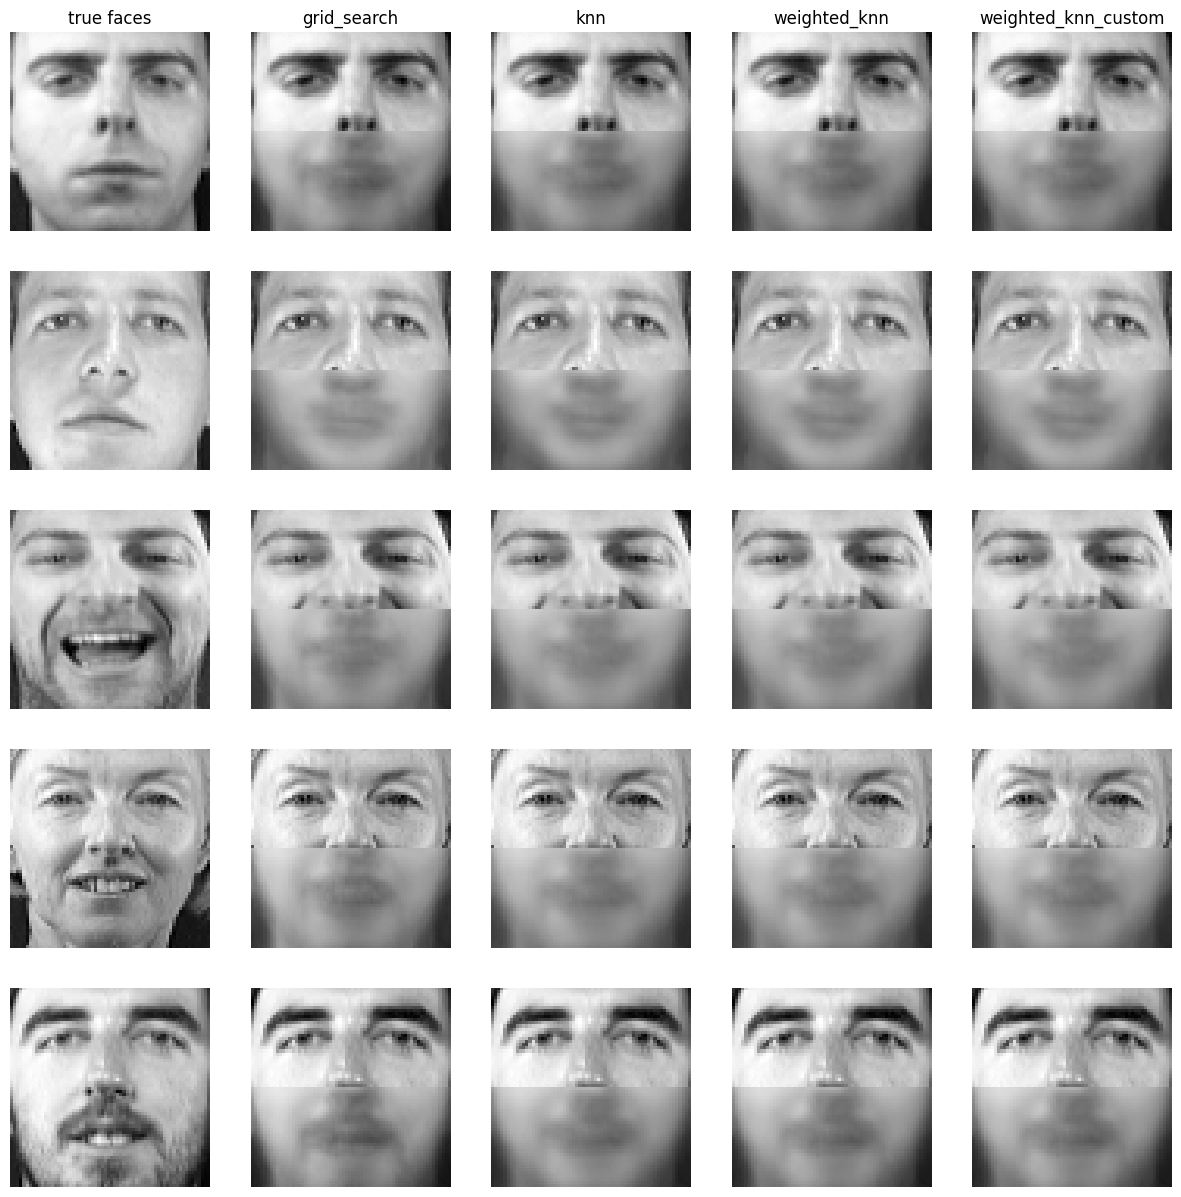

In [22]:
n_faces = 5
n_cols = 1 + len(ESTIMATORS)
image_shape = (64, 64)
plt.figure(figsize=(3 * n_cols, 3 * n_faces))


for i in range(5):
    true_face = np.hstack((X_test[i], y_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1, title="true faces")

    sub.axis("off")
    sub.imshow(
        true_face.reshape(image_shape), cmap=plt.cm.gray, interpolation="nearest"
    )

    for j, est in enumerate(sorted(ESTIMATORS)):
        completed_face = np.hstack((X_test[i], pred_test[est][i]))

        if i:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j)

        else:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j, title=est)

        sub.axis("off")
        sub.imshow(
            completed_face.reshape(image_shape),
            cmap=plt.cm.gray,
            interpolation="nearest",
        )